# Домашняя работа №5

In [7]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import ssl
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from IPython.display import Image
from scipy.stats import pearsonr
%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [8]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [9]:
len(data[data['Dataset']==2])

167

In [10]:
len(data[data['Dataset']==1])

416

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [18]:
data.shape

(583, 11)

In [19]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


В наборе данных 11 столбцов и 583 строк, почти без нулевых значений.

#### Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin.

In [66]:
r, p = pearsonr(data['Direct_Bilirubin'], data['Total_Bilirubin'])
print(r, p)
if p > 0.05:
    print('Зависимости нет')
else:
    print('Существует зависимость между выбарками')

0.8746179301164134 7.873553178023721e-185
Существует зависимость между выбарками


#### Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Direct_Bilirubin = np.array(data.Direct_Bilirubin).reshape(-1,1)
Total_Bilirubin = np.array(data.Total_Bilirubin).reshape(-1,1)

mod = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(
    Direct_Bilirubin,
    Total_Bilirubin,
    test_size =  0.2
)

mod.fit(X_train, y_train)

LinearRegression()

Построим линейную регрессию

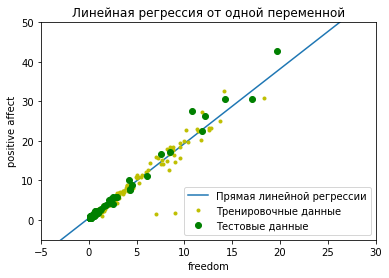

In [22]:
plt.xlabel('freedom')
plt.ylabel('positive affect')
plt.title('Линейная регрессия от одной переменной')

x = np.linspace(-100, 200, 100)
y = mod.coef_*x + mod.intercept_
y = np.transpose(y)

plt.plot(x,y)
plt.plot(X_train, y_train, 'y.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-5,30)
plt.ylim(-5,50)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()


Пример, как считать квантили:

In [23]:
age = data['Age']

In [24]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [25]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


Пример квартилей:

In [26]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


#### Посчитать квартили для всех **колонок**. 

In [27]:
data.quantile([.25, .50, .75], axis = 0)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.10,2.0


#### Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

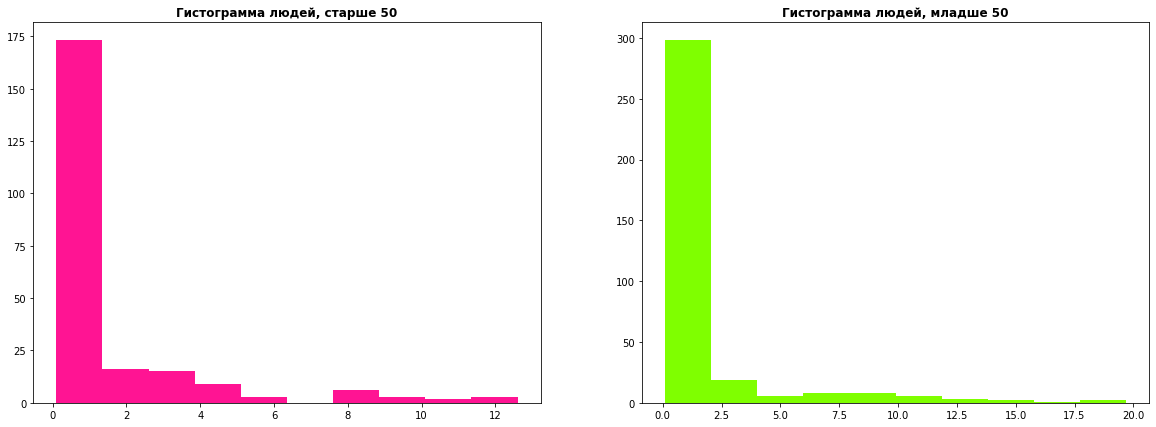

Среднее значение (возраст<50) = 1.4946175637393755, квартиль 0.5 = 0.3
Среднее значение (возраст >=50) = 1.4730434782608677, квартиль 0.5 = 0.4


In [48]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

s_age = data[age < 50]['Direct_Bilirubin']
b_age = data[age >= 50]['Direct_Bilirubin']

axes[0].hist(b_age, facecolor='deeppink')
axes[0].set_title('Гистограмма людей, старше 50',fontweight="bold")

axes[1].hist(s_age,facecolor='chartreuse')
axes[1].set_title('Гистограмма людей, младше 50',fontweight="bold")

plt.show()

print(f'Среднее значение (возраст<50) = {s_age.mean()}, квартиль 0.5 = {s_age.quantile(.50)}')
print(f'Среднее значение (возраст >=50) = {b_age.mean()}, квартиль 0.5 = {b_age.quantile(.50)}')

Разница получилась не очень большая, но у взрослых людей среднее значение меньше, в то время как квартиль 0.5 - больше. 

#### Посчитать критерий одновыборочный t-критерий для выборки по показанию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность (все люди из выборки)? Сравнить t-критерий с табличным показателем граничного t-критерия Стьюдента. alpha = 0.05, доверительная вероятность 95%. Число степеней свободы = (количество людей больных  - 1). Если t-value, посчитанное с помощью теста, больше порогового табличного, то мы отклоняем нулевую гипотезу о сходстве.

In [52]:
bil_bolnyh = data[data['Dataset'] == 1]['Total_Bilirubin']
stats.ttest_1samp(bil_bolnyh, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

In [67]:
print('Количество больных: ', len(bil_bolnyh))

Количество больных:  416


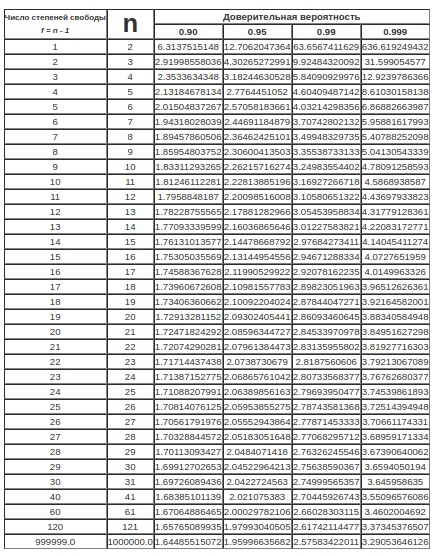

In [54]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

Значение t-value = 2.47,исходя из таблицы это больше чем любое значение в промежутке 1.96-1.97, поэтому отвергаем нулевую гипотезу.

#### Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть (по p-value)?

In [55]:
b = data[data['Dataset'] == 1]['Total_Bilirubin']
z = data[data['Dataset'] == 2]['Total_Bilirubin']
stats.ttest_ind(b, z)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

P-value равно 7.8е-08, что намного меньше стандартной альфа ошибки 0.05, следовательно, не принимаем нулевую гипотезу и можем сказать, что имеется существенное статистическое различие между показателями Билирубина у больных и здоровых людей.

C:\Users\karina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\karina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


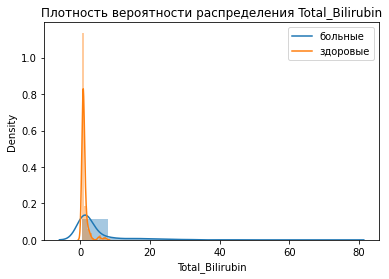

In [60]:
sns.distplot(b, 10)
sns.distplot(z, 10)
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['больные', 'здоровые'])
plt.show()

#### Посчитать статистическую значимость для **трех** выборок (по возрасту) -**тест Anova** - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью: будут ли эти группы отличаться в дейстивельности (на ваш взгляд).

In [65]:
gr1_age = data[data['Age'] <= 30]['Dataset']
gr2_age = data[(data['Age'] > 30) & (data['Age'] <= 55)]['Dataset']
gr3_age = data[data['Age'] > 55]['Dataset']

stats.f_oneway(gr1_age, gr2_age, gr3_age)

F_onewayResult(statistic=8.942833990557906, pvalue=0.0001495741914244918)

P-value меньше стандартной альфа ошибки(0.05), поэтому отклоняем гипотезу о том, что нет различий у разных возрастных групп.Схожесть с реальностью есть, так как с возрастом организм стареет.